test7 polytrope model for 100R


test8 polytrope model 100R for lowT

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import athena_read as ar
import OrbitAnalysisUtils as ou
import Constants 

from mpl_toolkits.axes_grid1 import ImageGrid
from tqdm.auto import tqdm
#from skimage import measure
import scipy
from scipy.interpolate import RegularGridInterpolator
from scipy.special import expit
from athena_read import athdf

c=Constants.Constants()

%matplotlib inline


## reproducibility info
import reproducible
context = reproducible.Context()
context.add_cpu_info()
context.export_yaml('context.txt')


Constants defined...


'680c3b34616724f6f4b7656907f6cce606ce7db9b5c25307ad9dc14129b0c549'

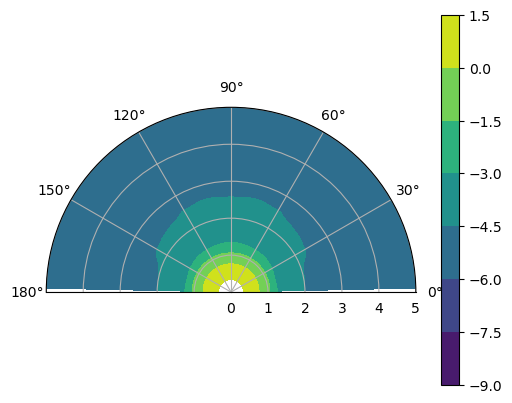

In [48]:
from athena_read import athdf


base_dir = '../../data/planetary_engulfment_test8/'
data = athdf(base_dir+'/PEGM.out1.00200.athdf')
gamma=1.66667

#plt.plot(data['x1v']/c.rsun,np.log10((data['press']/(gamma-1))/((data['vel1']**2+data['vel2']**2+data['vel3']**2)*data['rho']))[90,48,:])
theta,r = np.meshgrid(data['x2v'],data['x1v']/c.rsun)
#values = np.sum(np.log10((data['press']/(gamma-1))/((data['vel1']**2+data['vel2']**2+data['vel3']**2)*data['rho'])),axis=0)/192
values = np.sum(np.log10(data['rho']),axis=0)/192

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
pcm=ax.contourf(theta, r, values.T)
ax.set_xlim(0,np.pi)
ax.set_ylim(0,5)
fig.colorbar(pcm, ax=ax)

plt.show()


#plt.contour(data['x1v']/c.rsun*np.sin(data['x2v']),data['x1v']/c.rsun*np.sin(data['x2v']),np.sum(np.log10((data['press']/(gamma-1))/((data['vel1']**2+data['vel2']**2+data['vel3']**2)*data['rho'])),axis=3))


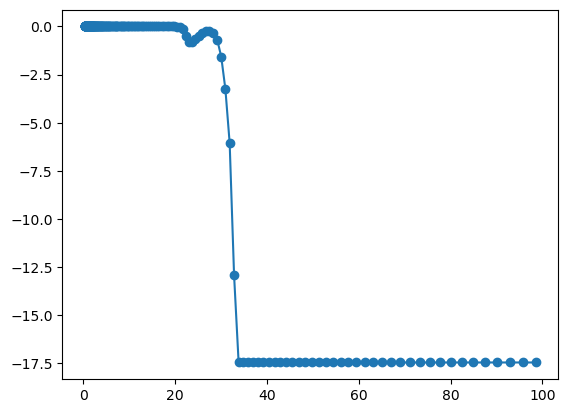

In [28]:
from athena_read import athdf


base_dir = '../../data/planetary_engulfment_test8/'
data = athdf(base_dir+'/PEGM.out1.00200.athdf')
gamma=1.66667
plt.plot(data['x1v']/c.rsun,np.log10((data['r0'])[90,90,:]),"-o")



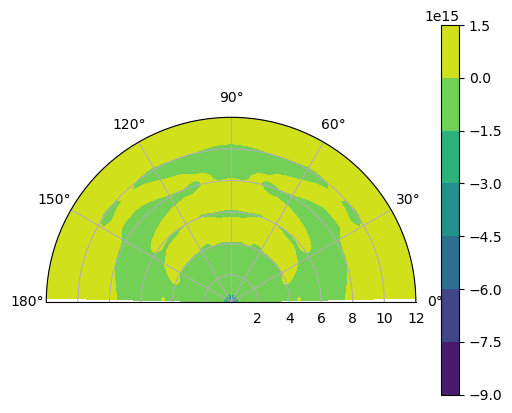

In [61]:
from athena_read import athdf


base_dir = '../../data/planetary_engulfment_test8/'
d = athdf(base_dir+'/PEGM.out1.00200.athdf')
gamma=1.66667
v_abs = np.sqrt(d['vel1']**2+d['vel2']**2+d['vel3']**2)
r_phi = np.loadtxt(base_dir+"potential.dat")
phi_interp = scipy.interpolate.interp1d(r_phi[:,0],r_phi[:,1])
phi_r = phi_interp(d['x1v'])
B = d['rho']*d['r0']*v_abs**2/2+d['rho']*d['r0']*phi_r+d['press']*(1+1/(gamma-1))

#plt.plot(data['x1v']/c.rsun,np.log10((data['press']/(gamma-1))/((data['vel1']**2+data['vel2']**2+data['vel3']**2)*data['rho']))[90,48,:])
theta,r = np.meshgrid(data['x2v'],data['x1v']/c.rsun)
#values = np.sum(np.log10((data['press']/(gamma-1))/((data['vel1']**2+data['vel2']**2+data['vel3']**2)*data['rho'])),axis=0)/192
values = np.sum(B,axis=0)/192

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
pcm=ax.contourf(theta, r, values.T)
ax.set_xlim(0,np.pi)
ax.set_ylim(0.3,12)
fig.colorbar(pcm, ax=ax)

plt.show()

In [21]:
list(data)

['Coordinates',
 'DatasetNames',
 'MaxLevel',
 'MeshBlockSize',
 'NumCycles',
 'NumMeshBlocks',
 'NumVariables',
 'RootGridSize',
 'RootGridX1',
 'RootGridX2',
 'RootGridX3',
 'Time',
 'VariableNames',
 'x1f',
 'x1v',
 'x2f',
 'x2v',
 'x3f',
 'x3v',
 'rho',
 'press',
 'vel1',
 'vel2',
 'vel3',
 'r0',
 'r1',
 'r2',
 'r3',
 'r4',
 'r5',
 'r6',
 'r7']

reading orbit file for binary simulation...
tperi =  9600.743
66
0.6119373621112227


<function matplotlib.pyplot.show(close=None, block=None)>

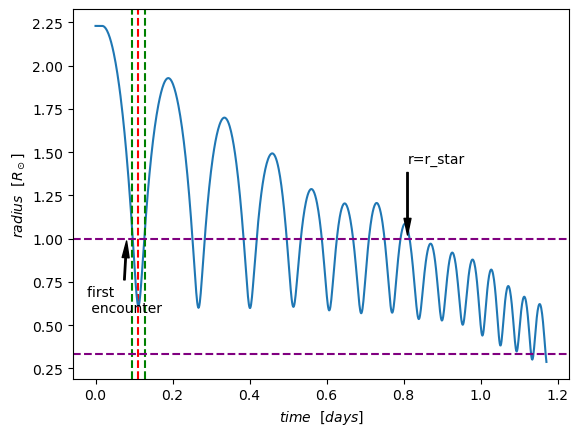

In [3]:
base_dir = '../../data/planetary_engulfment_test8/'
fig_mm = 1/25.4
Porb = 32.836*(86400)
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")

sel = (orb['time']>3000) & (orb['time']<15000)
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)
print(np.argmin(orb[sel]['sep']))
print(orb[sel]['sep'][ np.argmin(orb[sel]['sep']) ]/c.rsun)
plt.axvline(x=tperi/3600/24, color='r', linestyle='--')

# find the encounter time and the leaving time
r_star = 6.955e10
r_min = 2.31834e10
sel_left = (orb['time']>3000) & (orb['time']<tperi)
sel_right = (orb['time']<15000) & (orb['time']>tperi)

index_encounter = np.argmin(abs(orb[sel_left]['sep']-1.1*r_star))
index_leave = np.argmin(abs(orb[sel_right]['sep']-1.1*r_star))
t_encounter = orb[sel_left]['time'][index_encounter]
t_leave = orb[sel_right]['time'][index_leave]

#plot the orbit 
plt.plot(orb['time']/3600/24,orb['sep']/c.rsun)
plt.axvline(x=t_encounter/3600/24, color='g', linestyle='--')
plt.axvline(x=t_leave/3600/24, color='g', linestyle='--')
plt.axhline(y=r_star/c.rsun, color='purple', linestyle='--')
plt.axhline(y=r_min/c.rsun, color='purple', linestyle='--')
plt.annotate('r=r_star', xy=(70000/3600/24, r_star/c.rsun), xytext=(70000/3600/24, 1e11/c.rsun),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

plt.annotate('first \n encounter', xy=(7000/3600/24, r_star/c.rsun), xytext=(-2000/3600/24, 4e10/c.rsun),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

plt.annotate('collision with core', xy=(110000/3600/24, r_min/c.rsun), xytext=(70000/3600/24, 3e10/c.rsun),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))
plt.ylabel('$radius \ \ [R_\odot]$')
plt.xlabel('$time \ \ [days]$')
plt.show

In [ ]:
base_dir = '../../data/planetary_engulfment_test7/'
fig_mm = 1/25.4
Porb = 32.836*(86400)
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")

sel = (orb['time']>3000) & (orb['time']<15000)
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)
print(np.argmin(orb[sel]['sep']))
print(orb[sel]['sep'][ np.argmin(orb[sel]['sep']) ]/c.rsun)
plt.axvline(x=tperi/3600/24, color='r', linestyle='--')

# find the encounter time and the leaving time
r_star = 6.955e10
r_min = 2.31834e10
sel_left = (orb['time']>3000) & (orb['time']<tperi)
sel_right = (orb['time']<15000) & (orb['time']>tperi)

index_encounter = np.argmin(abs(orb[sel_left]['sep']-1.1*r_star))
index_leave = np.argmin(abs(orb[sel_right]['sep']-1.1*r_star))
t_encounter = orb[sel_left]['time'][index_encounter]
t_leave = orb[sel_right]['time'][index_leave]

#plot the orbit 
plt.plot(orb['time']/3600/24,orb['sep']/c.rsun)
plt.axvline(x=t_encounter/3600/24, color='g', linestyle='--')
plt.axvline(x=t_leave/3600/24, color='g', linestyle='--')
plt.axhline(y=r_star/c.rsun, color='purple', linestyle='--')
plt.axhline(y=r_min/c.rsun, color='purple', linestyle='--')
plt.annotate('r=r_star', xy=(70000/3600/24, r_star/c.rsun), xytext=(70000/3600/24, 1e11/c.rsun),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

plt.annotate('first \n encounter', xy=(7000/3600/24, r_star/c.rsun), xytext=(-2000/3600/24, 4e10/c.rsun),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

plt.annotate('collision with core', xy=(110000/3600/24, r_min/c.rsun), xytext=(70000/3600/24, 3e10/c.rsun),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))
plt.ylabel('$radius \ \ [R_\odot]$')
plt.xlabel('$time \ \ [days]$')
plt.show

reading orbit file for binary simulation...
tperi =  9601.215
66
0.610192670499069


<function matplotlib.pyplot.show(close=None, block=None)>

reading orbit file for binary simulation...
tperi =  91303.02
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00030.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00050.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00070.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00090.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00110.athdf
 ..

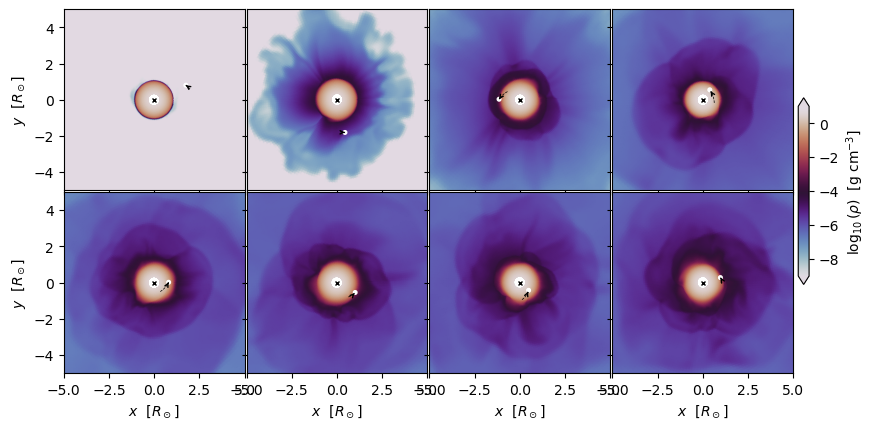

In [79]:
base_dir = '../../data/planetary_engulfment_test7/'
fig_mm = 1/25.4 #figure size
Porb = 10000   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>75000) & (orb['time']<95000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1.00165.athdf",
            base_dir + "PEGM.out1.00170.athdf",
           base_dir + "PEGM.out1.00175.athdf",
           base_dir + "PEGM.out1.00180.athdf",
           base_dir + "PEGM.out1.00185.athdf",
           base_dir + "PEGM.out1.00190.athdf",
           base_dir + "PEGM.out1.00195.athdf",
           base_dir + "PEGM.out1.00200.athdf"]
filelist = []
start_id = 10
for id_name in range(8):
    datafile = base_dir + "PEGM.out1."+str(id_name*20+start_id).zfill(5)+".athdf"
    filelist.append(datafile)

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### DENSITY
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ) ),
               cmap='twilight',vmin=-9,vmax=1,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t-t_{\rm p}=$"+str(round((d['Time']-tperi)/86400.,1))+"d", (100,80),fontsize=7)
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun],radius=0.1,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    grid[i].set_ylim(-5,5)
    grid[i].set_xlim(-5,5)
    sel = (orb['time']>d['Time']-Porb/10) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/c.rsun,(orb[sel]['y']-orb[sel]['ycom'])/c.rsun,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
    grid[i].plot([0],[0],'kx',markersize=3)
    add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')
    


reading orbit file for binary simulation...
tperi =  91303.02
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.6666666666666667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.6666666666666667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.6666666666666667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.6666666666666667
...getting cartesian arrays...
read_data...reading file ../../data/planetar

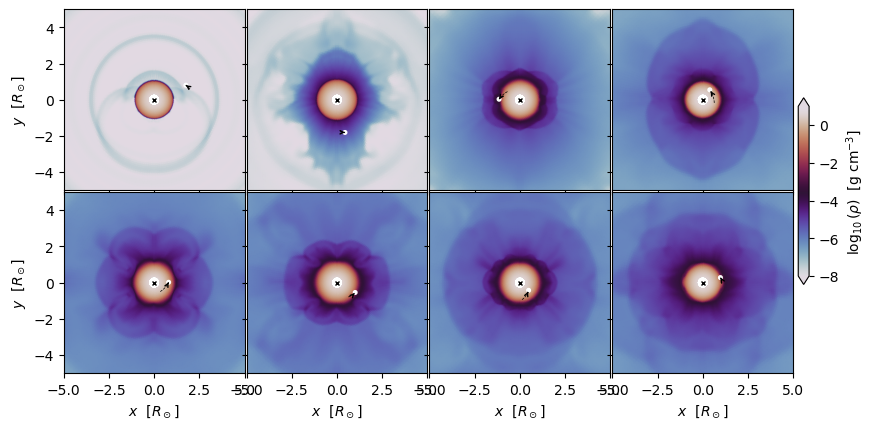

In [24]:
base_dir = '../../data/planetary_engulfment_test7/'
fig_mm = 1/25.4 #figure size
Porb = 10000   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>75000) & (orb['time']<95000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1.00165.athdf",
            base_dir + "PEGM.out1.00170.athdf",
           base_dir + "PEGM.out1.00175.athdf",
           base_dir + "PEGM.out1.00180.athdf",
           base_dir + "PEGM.out1.00185.athdf",
           base_dir + "PEGM.out1.00190.athdf",
           base_dir + "PEGM.out1.00195.athdf",
           base_dir + "PEGM.out1.00200.athdf"]
filelist = []
start_id = 10
for id_name in range(8):
    datafile = base_dir + "PEGM.out1."+str(id_name*20+start_id).zfill(5)+".athdf"
    filelist.append(datafile)

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.0

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,get_cartesian= True,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### DENSITY
    xx,zz,rho = ou.get_plot_array_vertical('rho',np.pi,myfile,base_dir+'polytrope.dat',orb,m1=0,m2=0)
    xx,zz,r0 = ou.get_plot_array_vertical('r0',np.pi,myfile,base_dir+'polytrope.dat',orb,m1=0,m2=0)
    im=grid[i].pcolormesh(xx/c.rsun, zz/c.rsun, np.where(r0>r0thresh,np.log10(rho),np.nan),
               cmap='twilight',vmin=-8,vmax=1,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t-t_{\rm p}=$"+str(round((d['Time']-tperi)/86400.,1))+"d", (100,80),fontsize=7)
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun],radius=0.1,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    grid[i].set_ylim(-5,5)
    grid[i].set_xlim(-5,5)
    sel = (orb['time']>d['Time']-Porb/10) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/c.rsun,(orb[sel]['y']-orb[sel]['ycom'])/c.rsun,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
    grid[i].plot([0],[0],'kx',markersize=3)
    add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')
    

reading orbit file for binary simulation...
tperi =  91303.02
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00005.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00015.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00020.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00025.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00030.athdf
 ..

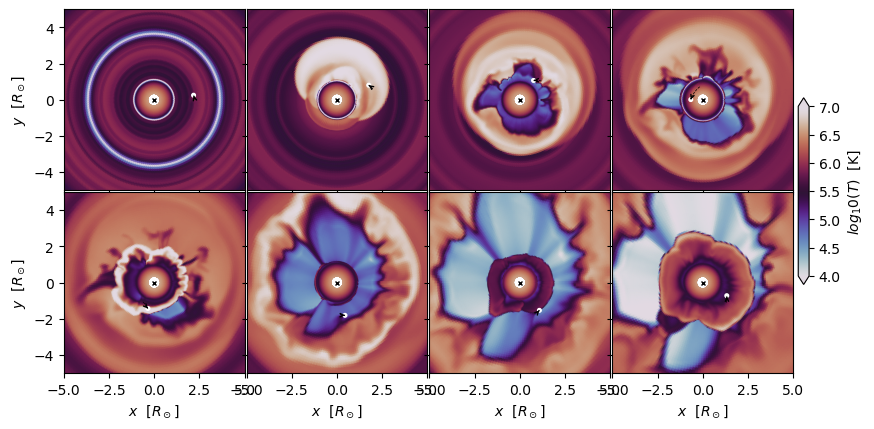

In [7]:
base_dir = '../../data/planetary_engulfment_test7/'
fig_mm = 1/25.4 #figure size
Porb = 10000   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>75000) & (orb['time']<95000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = []
start_id = 5
for id_name in range(8):
    datafile = base_dir + "PEGM.out1."+str(id_name*5+start_id).zfill(5)+".athdf"
    filelist.append(datafile)

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### TEMPERATURE
    temp = ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh,np.log10(((d['press']/d['rho']*c.mp/2/c.kB)[:,thind,:])),np.nan ) )
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun,
                           temp,
               cmap='twilight',vmin=4,vmax=7,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$log_10\left(  T \right)$  [K]')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t-t_{\rm p}=$"+str(round((d['Time']-tperi)/86400.,1))+"d", (100,80),fontsize=7)
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun],radius=0.1,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    grid[i].set_ylim(-5,5)
    grid[i].set_xlim(-5,5)
    sel = (orb['time']>d['Time']-Porb/10) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/c.rsun,(orb[sel]['y']-orb[sel]['ycom'])/c.rsun,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
    grid[i].plot([0],[0],'kx',markersize=3)
    add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')
    


reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test8/PEGM.out1.00005.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test8/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test8/PEGM.out1.00015.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test8/PEGM.out1.00020.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test8/PEGM.out1.00025.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test8/PEGM.out1.00030.athdf
 ...file read, constr

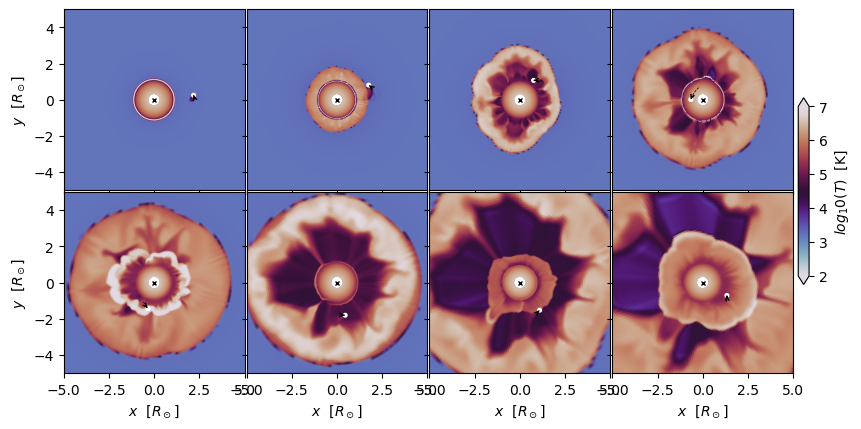

In [8]:
base_dir = '../../data/planetary_engulfment_test8/'
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")

filelist = []
start_id = 5
for id_name in range(8):
    datafile = base_dir + "PEGM.out1."+str(id_name*5+start_id).zfill(5)+".athdf"
    filelist.append(datafile)

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### TEMPERATURE
    temp = ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh,np.log10(((d['press']/d['rho']*c.mp/2/c.kB)[:,thind,:])),np.nan ) )
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun,
                           temp,
               cmap='twilight',vmin=2,vmax=7,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$log_10\left(  T \right)$  [K]')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')
    
    #grid[i].annotate(r"$t-t_{\rm p}=$"+str(round((d['Time']-tperi)/86400.,1))+"d", (100,80),fontsize=7)
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun],radius=0.1,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    grid[i].set_ylim(-5,5)
    grid[i].set_xlim(-5,5)
    sel = (orb['time']>d['Time']-Porb/10) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/c.rsun,(orb[sel]['y']-orb[sel]['ycom'])/c.rsun,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
    grid[i].plot([0],[0],'kx',markersize=3)
    add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')
    


reading orbit file for binary simulation...
tperi =  91303.02
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
max B is 23461801254.652725
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00030.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
max B is 505208153.8661512
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00050.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
max B is 61896641724.24112
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00070.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
max B is 1035350001.0885887
read_data...reading file ../../data/planetary_engulfment_test7/PEGM.out1.00090.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...gettin

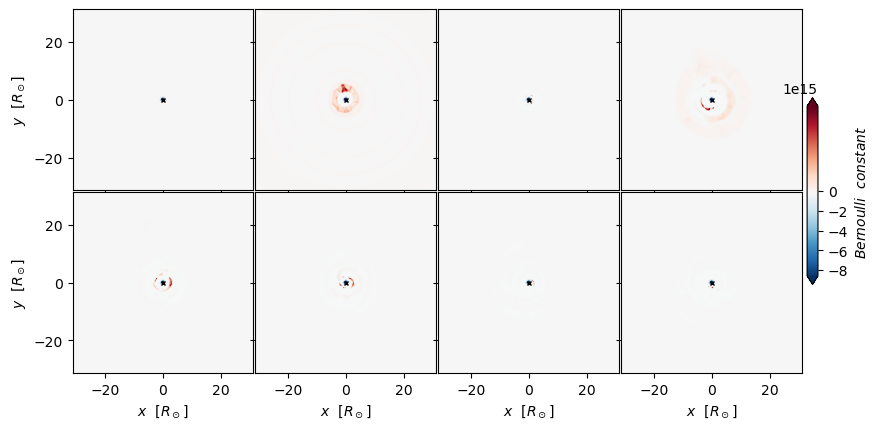

In [35]:
# plot unbounded mass by Bernoulli constant

base_dir = '../../data/planetary_engulfment_test7/'
fig_mm = 1/25.4 #figure size
Porb = 10000   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>75000) & (orb['time']<95000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = []
start_id = 10
for id_name in range(8):
    datafile = base_dir + "PEGM.out1."+str(id_name*20+start_id).zfill(5)+".athdf"
    filelist.append(datafile)

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.

    

for i,myfile in enumerate(filelist):
    gamma=1.66667
    d = ou.read_data(myfile,orb,gamma=gamma,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    v_abs = np.sqrt(d['vel1']**2+d['vel2']**2+d['vel3']**2)
    r_phi = np.loadtxt(base_dir+"potential.dat")
    phi_interp = scipy.interpolate.interp1d(r_phi[:,0],r_phi[:,1])
    phi_r = phi_interp(d['x1v'])
    B = d['rho']*d['r0']*v_abs**2/2+d['rho']*d['r0']*phi_r+d['press']*(1+1/(gamma-1))
    
    
    ### DENSITY
    from matplotlib.colors import TwoSlopeNorm
    
    B_mid =ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh,(B)[:,thind,:],np.nan))
    print('max B is',np.max(B_mid))
    norm = TwoSlopeNorm(vmin = np.min(B_mid),vcenter=0,vmax=np.max(B_mid))

    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun,
                           B_mid,
            norm = norm,cmap='RdBu_r',shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$Bernoulli \ \ constant$')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')

    grid[i].set_ylim(-2*1.0865e12/c.rsun,2*1.0865e12/c.rsun)
    grid[i].set_xlim(-2*1.0865e12/c.rsun,2*1.0865e12/c.rsun)
    grid[i].plot([0],[0],'kx',markersize=3)

    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')

In [34]:
print(1.594095e30/c.msun)

0.0008014555052790347


In [9]:
def get_interp_function(d,var,rescale_factor=1,method='linear'):
    """
    MM: Use RegularGridInterpolator to pass data to interpolating function for a given variable
    Parameters
    -----------
    d : dict
       athena data dict from read_data
    var: str
       name of variable to be interpolated
       
    Returns
    --------
    var_interp: an interpolating function that can be called with a tuple (phi,theta,r)
    """
    dph = np.gradient(d['x3v'])[0]
    dtheta = np.gradient(d['x2v'])[0]
    two_pi = ( (d['x3v'][-1]-d['x3v'][0]+dph) /(2*np.pi) > 0.99 ) # boolean to determine if spans 2pi in phi
    x1v = d['x1v']*rescale_factor
    var_shape = d[var].shape
    
    if two_pi:
        x3v = np.append(d['x3v'][0]-dph,d['x3v'])
        x3v = np.append(x3v,x3v[-1]+dph)
        var_data = np.append([d[var][-1]],d[var],axis=0)
        var_data = np.append(var_data,[var_data[0]],axis=0)
        var_shape = var_data.shape
    else:
        x3v = d['x3v']
        var_data = d[var]
        
    # extend in theta
    x2v = np.append(d['x2v'][0]-dtheta,d['x2v'])
    x2v = np.append(x2v,x2v[-1]+dtheta)
    var_data = np.append(var_data[:,0,:].reshape(var_shape[0],1,var_shape[2]),var_data,axis=1)
    var_data = np.append(var_data,var_data[:,-1,:].reshape(var_shape[0],1,var_shape[2]),axis=1)
        
    var_interp = RegularGridInterpolator((x3v,x2v,x1v),var_data,bounds_error=False,method=method)
    return var_interp

def cart_to_polar(x,y,z):
    """cartesian->polar conversion (matches 0<phi<2pi convention of Athena++)
    Parameters
    x, y, z
    Returns
    r, th, phi
    """
    r = np.sqrt(x**2 + y**2 +z**2)
    th = np.arccos(z/r)
    phi = np.arctan2(y,x)
    phi = np.where(phi>=0,phi,phi+2*np.pi)
    return np.stack((r, th, phi), axis=2)

def mesh_interpolate_at_xyzpoints(d,var,points):
    """
    MM: convience function to interpolate a variable to mesh points
    Parameters
    -----------
    d: athena++ data dict
    var: str variable name in, e.g. "rho"
    points: array of cartesian positions (eg vertices or centroids) (n,n,3) floats (x,y,z)
    """
    var_interp = get_interp_function(d,var)
    rp,thp,php = cart_to_polar(points[:,:,0],points[:,:,1],points[:,:,2])
    return var_interp( (php,thp,rp) )

In [3]:
da = np.arange(27)
da = da.reshape([3,3,3])
print(da.shape)

print(np.append(da,da[:,0,:].reshape(3,1,3),axis=1))

(3, 3, 3)
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 0  1  2]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]
  [ 9 10 11]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]
  [18 19 20]]]


In [29]:
print(opac(1.0e-9,1.0e5,0.7,0.02))
print(ff_opacity(1.0e-9,1.0e5,800))

3.4627058891784104e-10
8.046858225170863e-09


In [5]:
### integrate along radius from every solid angle
base_dir = '../../data/planetary_engulfment_test7/'
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
mylevel = None

# considering Hydrogen and ff opacity
def ff_opacity(rho, temp, wavelength):
    # in cgs unit
    opacity = 4.97*rho**2/temp**0.5*wavelength**3*1000
    return opacity

def Rosseland_mean_opacity(rho,temp):
    # in cgs unit
    opacity = 8e22*temp**(-7/2)*rho**2
    return opacity

def opac(rho,temp,X,Z):
    # in cgs units
    # molecules
    kappa_m = 0.1*Z
    
    # negative hydrogen ion
    kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
    
    # electron scattering
    kappa_e = 0.2*(1+X)/(1+2.7e11*rho/temp**2)/(1+(temp/4.5e8)**0.86)
    
    # Kramers formula
    kappa_K = 4e25*(1+X)*(Z+0.001)*rho/temp**3.5
    
    opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho
    
    return opacity

def observer_grid(n, box_half_length = 1.0865e11, method = 'uniform',direction ='z'):
    #n*n*3 rectangle gird
    
    if method == 'uniform':
        obs_grid_xx = box_half_length*np.ones((n,n))
        pos_yy = np.linspace(-box_half_length, box_half_length, n)
        pos_zz = pos_yy
        obs_grid_yy,obs_grid_zz = np.meshgrid(pos_yy, pos_zz)
        
        if direction == 'x':
            obs_grid = np.stack((obs_grid_xx, obs_grid_yy, obs_grid_zz), axis=2)
            
        if direction == 'z':
            obs_grid = np.stack((obs_grid_yy, obs_grid_zz, obs_grid_xx), axis=2)
            
        if direction == 'y':
            obs_grid = np.stack((obs_grid_yy, obs_grid_xx, obs_grid_zz), axis=2)
    return obs_grid

def optical_depth(data, wavelength, obs_grid, rescale_factor=1, dx = -1, direction = 'x',plot = True):
    """Marching the obs_grid along given direction to find the photo-spheric position
    
    Parameters:
    -------
    data: athena++ data dict
    wavelength: observer wavelength in nm
    obs_grid: observer grid, (n,n) matrix
    direction: observer direction: 'x','y','z'; all from positive axis to negtive
    
    Returns: (n,n,3) array with photo-spheric position in cartesian coordinates, found with coordinate<9*domain_size, not found with
    coordinate=10*domain size
    """
    
    ## initializition
    n = len(obs_grid)
    op_dep = np.zeros((n,n))
    marching_box_xyz = obs_grid.copy()
    
    # computitional domain size
    domain_size = np.max(obs_grid)
    #print(domain_size)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    pho_position = np.ones((n,n,3))*domain_size*10
    
    ## get interpolation function
    rho_star = data['rho']*data['r0']/rescale_factor**2
    rho_star_dict = {'rho_star':rho_star}
    data.update(rho_star_dict)
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    temp = data['press']/data['rho']*c.mp/2/c.kB/rescale_factor
    temp_dict = {'temp':temp}
    data.update(temp_dict)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    if dx == -1:
        dx = cell_size/10
        
    if direction == 'x':
        marching_pos = np.min(marching_box_xyz[:,:,0])
    if direction == 'y':
        marching_pos = np.min(marching_box_xyz[:,:,1])
    if direction == 'z':
        marching_pos = np.min(marching_box_xyz[:,:,2])
        
    # use success matrix to determine if the line of sight is on the star,-1 for no, 1 for yes, 0 for first success
    success= -1*np.ones((n,n)) 
        
    #print('marching_pos', marching_pos)
    while marching_pos>-domain_size:
        # get density and temperature to get opacity
        marching_box_rtp = cart_to_polar(marching_box_xyz[:,:,0],marching_box_xyz[:,:,1],marching_box_xyz[:,:,2])
        rho_box = interp_rho((marching_box_rtp[:,:,2],marching_box_rtp[:,:,1],marching_box_rtp[:,:,0]))
        rho_box = np.where(np.isnan(rho_box), 10**10, rho_box)
        #print(rho_box)
        temp_box = interp_temp((marching_box_rtp[:,:,2],marching_box_rtp[:,:,1],marching_box_rtp[:,:,0]))
            
        # integral optical depth
        #op_dep_new = op_dep + ff_opacity(rho_box,temp_box,wavelength)*dx
        #op_dep_new = op_dep + Rosseland_mean_opacity(rho_box,temp_box)*dx
        op_dep_new = op_dep + opac(rho_box,temp_box,0.7,0.02)*dx
        
        op_dep = np.where(op_dep>=1,op_dep,op_dep_new)
        #print(ff_opacity(rho_box,temp_box,wavelength))
        #print(temp_box)
        success = np.where(op_dep>=1,success+1,success)
            
        #if np.any(success== 0.):
            #print('success')
        
        # marching
        marching_pos = marching_pos-dx
        if direction == 'x':
            marching_box_xyz[:,:,0] -= dx
        if direction == 'y':
            marching_box_xyz[:,:,1] -= dx
        if direction == 'z':
            marching_box_xyz[:,:,2] -= dx
            
        # if first success, restore the success coordinates
        pho_position[:,:,0] = np.where(success == 0.,marching_box_xyz[:,:,0],pho_position[:,:,0])
        pho_position[:,:,1] = np.where(success == 0.,marching_box_xyz[:,:,1],pho_position[:,:,1])
        pho_position[:,:,2] = np.where(success == 0.,marching_box_xyz[:,:,2],pho_position[:,:,2])
                
            
        
            
        success = np.where(success>=1,1,success)
            
       
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    #pho_radius = (pho_position[:,:,0]**2+pho_position[:,:,1]**2+pho_position[:,:,2]**2)**0.5/c.rsun
    #pho_radius = np.where(pho_radius>10,0,pho_radius)
    # plot
    if plot: 
        pho_radius = (pho_position[:,:,0]**2+pho_position[:,:,1]**2+pho_position[:,:,2]**2)**0.5/c.rsun
        pho_radius = np.where(pho_radius>9*(domain_size/c.rsun)*rescale_factor,0,pho_radius)
        if direction =='x':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()
        
    return pho_position

def Blackbody(wavelength,temp):
    """
    Planck blackbody emission, in cgs units, wavelength in nm
    """
    a = 2*c.h*c.c**2
    b = c.h*c.c/(wavelength*1e-7)/c.kB/temp
    return a/(wavelength*1e-7)**5/(np.exp(b)-1.0)


def flux(data,pho_pos,grid,wavelength,rescale_factor=1,lum_bolo=False, plot = True, direction ='z'):
    """
    Synthetic photometry, Planck blackbody emission flux
    """
    
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    domain_size = np.max(ob_grid)
    pho_radius = (pho_pos[:,:,0]**2+pho_pos[:,:,1]**2+pho_pos[:,:,2]**2)**0.5/c.rsun
    pho_radius = np.where(pho_radius>9*(domain_size/c.rsun)*rescale_factor,0,pho_radius)
    
    ## get interpolation function
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    
    # computitional domain size
    domain_size = np.max(grid)
    n = len(grid)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    
    # flux intensity 
    pho_pos_rtp = cart_to_polar(pho_pos[:,:,0],pho_pos[:,:,1],pho_pos[:,:,2])
    pho_temp = interp_temp((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0]))
    #print(pho_temp)
    #print(interp_rho((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0])))
    if lum_bolo:
        flux_intensity = pho_temp**4*c.sigmaSB
        flux_intensity = np.where(pho_radius==0,0,flux_intensity)
        flux = flux_intensity*area
    else:
        flux_intensity = Blackbody(wavelength, pho_temp)
        flux_intensity = np.where(pho_radius==0,0,flux_intensity)
        flux = flux_intensity*area
    
    #print(np.where(pho_temp>1e15,pho_radius,0))
    
    # plot
    if plot: 
        if direction =='x':
            plt.pcolor(grid[0,:,1]/c.rsun,grid[:,0,2]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,2]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,1]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()
        
    return flux

def temp_flux(data,pho_pos,grid,wavelength,rescale_factor=1,plot = True, direction ='z'):
    """
    Synthetic photometry, Planck blackbody emission flux
    """
    
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    domain_size = np.max(ob_grid)
    pho_radius = (pho_pos[:,:,0]**2+pho_pos[:,:,1]**2+pho_pos[:,:,2]**2)**0.5/c.rsun
    pho_radius = np.where(pho_radius>9*(domain_size/c.rsun)*rescale_factor,0,pho_radius)
    
    ## get interpolation function
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    
    # computitional domain size
    domain_size = np.max(grid)
    n = len(grid)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    
    # flux intensity 
    pho_pos_rtp = cart_to_polar(pho_pos[:,:,0],pho_pos[:,:,1],pho_pos[:,:,2])
    pho_temp = interp_temp((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0]))
    #print(pho_temp)
    #print(interp_rho((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0])))
    
    flux_intensity = np.where(pho_radius==0,np.NAN,pho_temp)
    flux = flux_intensity
    
    #print(np.where(pho_temp>1e15,pho_radius,0))
    
    # plot
    if plot: 
        if direction =='x':
            plt.pcolor(grid[0,:,1]/c.rsun,grid[:,0,2]/c.rsun,np.log10(flux), cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,2]/c.rsun,np.log10(flux), cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,1]/c.rsun,np.log10(flux), cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()
        
    return flux

def integrated_luminosity(id_order):
    """
    Sum the flux to get integrated luminosity
    """
    # read data
    id_name = id_order+start_id
    datafile = dirname + "PEGM.out1."+str(id_name).zfill(5)+".athdf"
    data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                    get_energy=False,profile_file=dirname+'polytrope.dat')
    time = data['Time']
        
    pho_pos = optical_depth(data,wavelength,ob_grid,direction=direction)
    flux_con = flux(data, pho_pos, ob_grid, wavelength,plot=False, direction=direction)
    int_lum = np.sum(flux_con)
    
    return int_lum, time
    
def light_curve(dirname, start_time, end_time, time_incre, wavelength, grid_size, plot = True, direction ='z'):
    """
    Temporal evolution of the integrated luminosity
    """
    
    # find data file by time and loop over files
    start_id = round(start_time/time_incre)-10
    end_id = round(end_time/time_incre)+10
    file_num = end_id-start_id+1
    
    lum_time = np.zeros(file_num)
    time = np.zeros(file_num)
    
    ob_grid=observer_grid(grid_size,direction=direction) # should be fixed
    
    #from multiprocessing import Pool
    
    #with Pool(64) as p:
        #lum_time, time=p.map(integrated_luminosity, id_order,start_id,dirname,orb,mylevel,wavelength,ob_grid,direction)
        
    
   #""" 
    # Non-parrallel
    for id_order in range(file_num):
        # read data
        id_name = id_order+start_id
        datafile = dirname + "PEGM.out1."+str(id_name).zfill(5)+".athdf"
        data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')
        time[id_order] = data['Time']
        
        pho_pos = optical_depth(data,wavelength,ob_grid,direction=direction)
        flux_con = flux(data, pho_pos, ob_grid, wavelength,plot=False, direction=direction)
        int_lum = np.sum(flux_con)
        lum_time[id_order] = int_lum
   # """
    
    if plot:
        plt.plot(time,lum_time)
        plt.title('Light Curve')
        plt.xlabel('$Time$')
        plt.ylabel('$Luminosity$')
        plt.show()

reading orbit file for binary simulation...


/tmp/ipykernel_692224/1300878825.py:180: RuntimeWarning: overflow encountered in exp
  return a/(wavelength*1e-7)**5/(np.exp(b)-1.0)


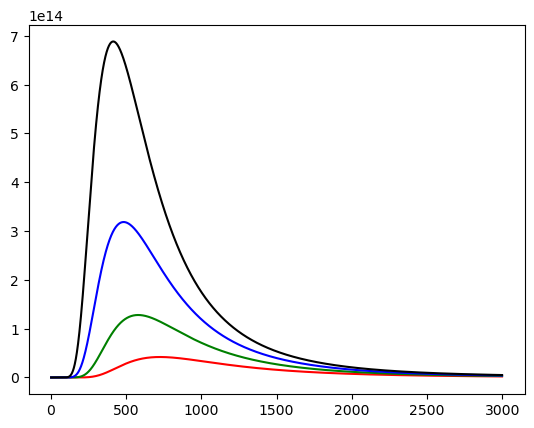

In [166]:
h = 6.626e-34
cc = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*cc**2
    b = h*cc/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

wavelengths = np.arange(1e-9, 3e-6, 1e-9)*1e9
# intensity at 4000K, 5000K, 6000K, 7000K

intensity4000 = Blackbody(wavelengths, 4000.)
intensity5000 = Blackbody(wavelengths, 5000.)
intensity6000 = Blackbody(wavelengths, 6000.)
intensity7000 = Blackbody(wavelengths, 7000.)
"""
intensity4000 = planck(wavelengths/1e9, 4000.)
intensity5000 = planck(wavelengths/1e9, 5000.)
intensity6000 = planck(wavelengths/1e9, 6000.)
intensity7000 = planck(wavelengths/1e9, 7000.)
"""
plt.plot(wavelengths, intensity4000, 'r-') 
# plot intensity4000 versus wavelength in nm as a red line
plt.plot(wavelengths, intensity5000, 'g-') # 5000K green line
plt.plot(wavelengths, intensity6000, 'b-') # 6000K blue line
plt.plot(wavelengths, intensity7000, 'k-') # 7000K black line

# show the plot
plt.show()

In [40]:
base_dir = '../../data/planetary_engulfment_test8/'
myfile = base_dir+"PEGM.out1.00100.athdf"

data = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

r0_max = np.max(np.argmax(np.log10(data['r0'])<-15,axis=2))
r_max = data['x1v'][r0_max]
print(r_max*1.5/c.rsun)

read_data...reading file ../../data/planetary_engulfment_test8/PEGM.out1.00100.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
40.001620570179725


In [41]:
############
#rescale
rescale_factor = 1
############
direction='z'
ob_grid=observer_grid(100,box_half_length = r_max*1.5*rescale_factor,direction=direction)


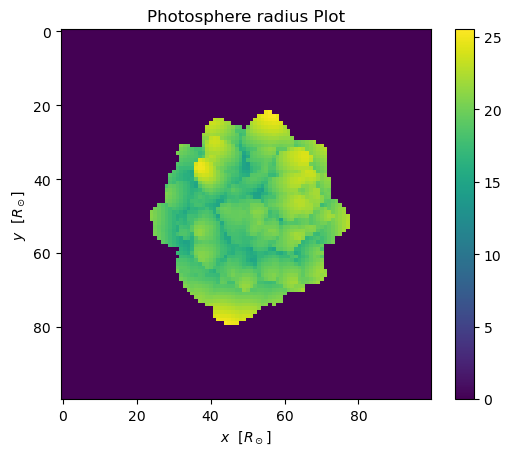

In [42]:
wavelength = 800
pho_pos = optical_depth(data,wavelength,ob_grid,rescale_factor=rescale_factor,direction=direction)
#print(np.max(pho_pos)/c.rsun)


In [17]:
np.max(np.where(pho_pos>1e13,0,pho_pos))

0.0

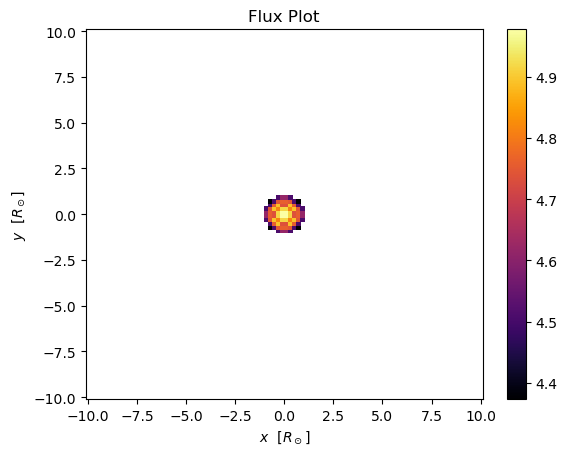

nan
nan


In [15]:
wavelength =10
flux_1 = temp_flux(data,pho_pos, ob_grid,wavelength,direction=direction)
#flux_1 = flux(data,pho_pos, ob_grid,wavelength,lum_bolo=True,direction=direction)
print(np.sum(flux_1))
print(np.max(flux_1))

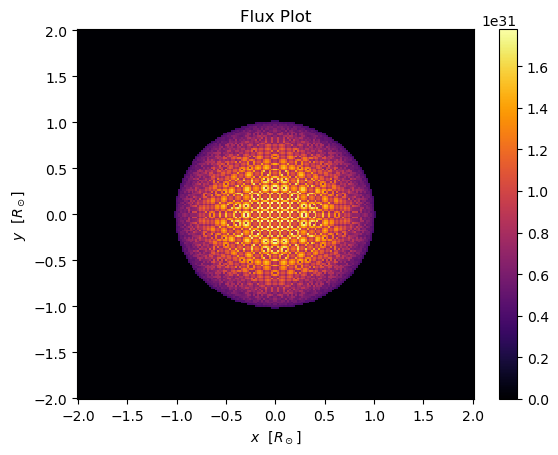

7.242957904453781e+34
1.7767258029910608e+31


In [12]:
wavelength =10
#flux_1 = temp_flux(data,pho_pos, ob_grid,wavelength,direction=direction)
flux_1 = flux(data,pho_pos, ob_grid,wavelength,lum_bolo=True,direction=direction)
print(np.sum(flux_1))
print(np.max(flux_1))

In [ ]:
200:5.4553214774413996e+44
15:1.4499714684739338e+46
30:2.4457902936995635e+46(100resolution)
30:2.3245553235285734e+46(200resolution)
5:1.6857081617948196e+41

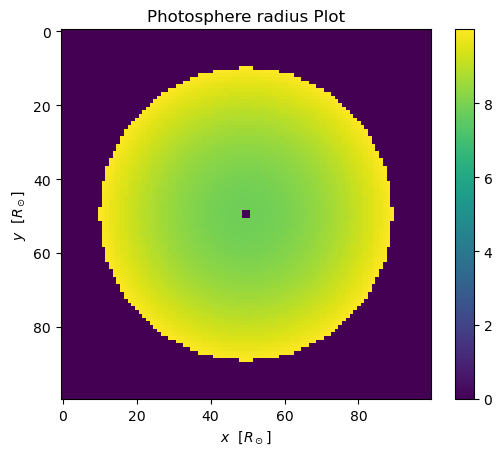

In [11]:
wavelength = 800
pho_pos = optical_depth(data,wavelength,ob_grid,rescale_factor=rescale_factor,direction=direction)
#print(np.max(pho_pos)/c.rsun)

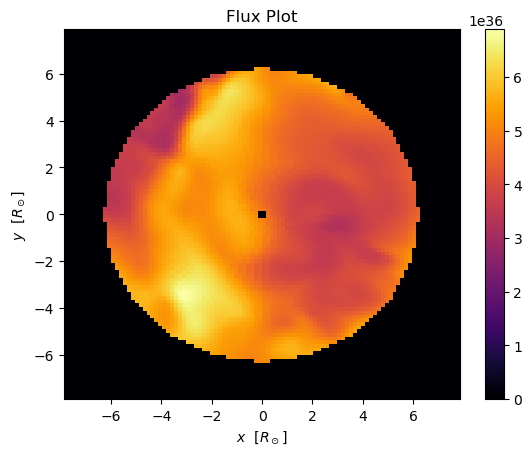

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
flux(data,pho_pos, ob_grid,wavelength,direction=direction)

In [2]:
import multiprocessing as mp
print(mp.cpu_count())

64


In [3]:
def print_func(continent='Asia'):
    print('The name of continent is : ', continent)


In [4]:
from multiprocessing import Process
names = ['America', 'Europe', 'Africa']
procs = []
proc = Process(target=print_func)  # instantiating without any argument
procs.append(proc)
proc.start()

The name of continent is :  Asia


In [6]:
# instantiating process with arguments
for name in names:
    # print(name)
    proc = Process(target=print_func, args=(name,))
    procs.append(proc)
    proc.start()

The name of continent is :  America
The name of continent is :  Europe
The name of continent is :  Africa


In [7]:
# complete the processes
for proc in procs:
    proc.join()

In [16]:
from multiprocessing import Pool,Array,Process, Manager
import numpy as np

import time

work = (("A", 5), ["B", 2], ["C", 1], ["D", 3])


def work_log(work_data):
    print(" Process %s waiting %s seconds \n" % (work_data[0], work_data[1]))
    time.sleep(int(work_data[1]))
    #arr[work_data[1]] = 0
    print(" Process %s Finished." % work_data[0])
    #res.append(work_data[0])
    
def work_log_1(work_data,arr):
    print(" Process %s waiting %s seconds \n" % (work_data[0], work_data[1]))
    time.sleep(int(work_data[1]))
    arr[work_data[1]] = 0
    print(" Process %s Finished." % work_data[0])
    #res.append(work_data[0])


def pool_handler():
    time_start = time.time()
    p = Pool(3)
    p.map_async(work_log, work)
    
    p.close()
    p.join()
    print(time.time()-time_start)
    
def func2(noerr):
    print("no error")
    
def func3(err):
    print("error")

def init():
    global arr
    arr = Array('i', np.arange(10))
    
class output:
    def __init__(self):
        self.arr = Array('i', np.arange(10))
        
        
def pool_apply():
    time_start = time.time()
    p = Pool()
    manager = Manager()
    arr = manager.Array('i',range(10))
    for i in work:
        p.apply_async(work_log_1,args=(i,arr))
        #p.apply_async(work_log,args=(i),callback=func2, error_callback=func3)
    
    p.close()
    p.join()
    print(arr[:])
    print(time.time()-time_start)
    
def process_handler():
    time_start = time.time()
    p_list =[]
    arr = Array('i',range(10))
    for i in work:
        p = Process(target=work_log_1, args=(i,arr))
        p.daemon=True
        p_list.append(p)
    
    for p in p_list:
        p.start()
    for p in p_list:
        p.join()
        
    print(time.time()-time_start)
    print(np.array(arr))
        
        
#pool_handler()
pool_apply()
#process_handler()


 Process A waiting 5 seconds 
 Process B waiting 2 seconds 
 Process C waiting 1 seconds 
 Process D waiting 3 seconds 




 Process C Finished.
 Process B Finished.
 Process D Finished.
 Process A Finished.
array('i', [0, 0, 0, 0, 4, 0, 6, 7, 8, 9])
5.055198907852173


In [ ]:
5.03482723236084

In [ ]:
5.014458894729614